# IEEE Fraud Detection Dataset EDA - Data Processing and Model Prototyping

In [1]:
# Lib Imports
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression, LinearRegression, LassoCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
# Setting Pandas column display option
pd.set_option('display.max_columns', 500)

In [3]:
idee = pd.read_csv('train_identity.csv')
transaction = pd.read_csv('train_transaction.csv')

# Inner merging tables with Transactions on the Left

In [4]:
merge = transaction.merge(idee, how='outer', on='TransactionID')

In [5]:
merge.dtypes.value_counts()

float64    399
object      31
int64        4
dtype: int64

# Processing Categorical Data

In [6]:
objects = merge.select_dtypes('object')
objects.astype('category')

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_12,id_15,id_16,id_23,id_27,id_28,id_29,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,W,discover,credit,NaN,NaN,T,T,T,M2,F,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,W,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,W,visa,debit,outlook.com,NaN,T,T,T,M0,F,F,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,W,mastercard,debit,yahoo.com,NaN,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,H,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NotFound,New,NotFound,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,W,visa,debit,NaN,NaN,T,T,T,M0,T,F,F,F,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,W,mastercard,debit,gmail.com,NaN,T,F,F,M0,F,T,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,W,mastercard,debit,gmail.com,NaN,T,F,F,NaN,NaN,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,W,mastercard,debit,aol.com,NaN,T,T,T,M0,F,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
objects.fillna("Unknown", inplace=True)
objects.head()

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_12,id_15,id_16,id_23,id_27,id_28,id_29,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,W,discover,credit,Unknown,Unknown,T,T,T,M2,F,T,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
1,W,mastercard,credit,gmail.com,Unknown,Unknown,Unknown,Unknown,M0,T,T,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
2,W,visa,debit,outlook.com,Unknown,T,T,T,M0,F,F,F,F,F,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
3,W,mastercard,debit,yahoo.com,Unknown,Unknown,Unknown,Unknown,M0,T,F,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
4,H,mastercard,credit,gmail.com,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NotFound,New,NotFound,Unknown,Unknown,New,NotFound,Android 7.0,samsung browser 6.2,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [8]:
objects = pd.get_dummies(objects)
objects.head()

,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_Unknown,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_Unknown,card6_charge card,card6_credit,card6_debit,card6_debit or credit,P_emaildomain_Unknown,P_emaildomain_aim.com,P_emaildomain_anonymous.com,P_emaildomain_aol.com,P_emaildomain_att.net,P_emaildomain_bellsouth.net,P_emaildomain_cableone.net,P_emaildomain_centurylink.net,P_emaildomain_cfl.rr.com,P_emaildomain_charter.net,P_emaildomain_comcast.net,P_emaildomain_cox.net,P_emaildomain_earthlink.net,P_emaildomain_embarqmail.com,P_emaildomain_frontier.com,P_emaildomain_frontiernet.net,P_emaildomain_gmail,P_emaildomain_gmail.com,P_emaildomain_gmx.de,P_emaildomain_hotmail.co.uk,P_emaildomain_hotmail.com,P_emaildomain_hotmail.de,P_emaildomain_hotmail.es,P_emaildomain_hotmail.fr,P_emaildomain_icloud.com,P_emaildomain_juno.com,P_emaildomain_live.com,P_emaildomain_live.com.mx,P_emaildomain_live.fr,P_emaildomain_mac.com,P_emaildomain_mail.com,P_emaildomain_me.com,P_emaildomain_msn.com,P_emaildomain_netzero.com,P_emaildomain_netzero.net,P_emaildomain_optonline.net,P_emaildomain_outlook.com,P_emaildomain_outlook.es,P_emaildomain_prodigy.net.mx,P_emaildomain_protonmail.com,P_emaildomain_ptd.net,P_emaildomain_q.com,P_emaildomain_roadrunner.com,P_emaildomain_rocketmail.com,P_emaildomain_sbcglobal.net,P_emaildomain_sc.rr.com,P_emaildomain_servicios-ta.com,P_emaildomain_suddenlink.net,P_emaildomain_twc.com,P_emaildomain_verizon.net,P_emaildomain_web.de,P_emaildomain_windstream.net,P_emaildomain_yahoo.co.jp,P_emaildomain_yahoo.co.uk,P_emaildomain_yahoo.com,P_emaildomain_yahoo.com.mx,P_emaildomain_yahoo.de,P_emaildomain_yahoo.es,P_emaildomain_yahoo.fr,P_emaildomain_ymail.com,R_emaildomain_Unknown,R_emaildomain_aim.com,R_emaildomain_anonymous.com,R_emaildomain_aol.com,R_emaildomain_att.net,R_emaildomain_bellsouth.net,R_emaildomain_cableone.net,R_emaildomain_centurylink.net,R_emaildomain_cfl.rr.com,R_emaildomain_charter.net,R_emaildomain_comcast.net,R_emaildomain_cox.net,R_emaildomain_earthlink.net,R_emaildomain_embarqmail.com,R_emaildomain_frontier.com,R_emaildomain_frontiernet.net,R_emaildomain_gmail,R_emaildomain_gmail.com,R_emaildomain_gmx.de,R_emaildomain_hotmail.co.uk,R_emaildomain_hotmail.com,R_emaildomain_hotmail.de,R_emaildomain_hotmail.es,R_emaildomain_hotmail.fr,R_emaildomain_icloud.com,R_emaildomain_juno.com,R_emaildomain_live.com,R_emaildomain_live.com.mx,R_emaildomain_live.fr,R_emaildomain_mac.com,R_emaildomain_mail.com,R_emaildomain_me.com,R_emaildomain_msn.com,R_emaildomain_netzero.com,R_emaildomain_netzero.net,R_emaildomain_optonline.net,R_emaildomain_outlook.com,R_emaildomain_outlook.es,R_emaildomain_prodigy.net.mx,R_emaildomain_protonmail.com,R_emaildomain_ptd.net,R_emaildomain_q.com,R_emaildomain_roadrunner.com,R_emaildomain_rocketmail.com,R_emaildomain_sbcglobal.net,R_emaildomain_sc.rr.com,R_emaildomain_scranton.edu,R_emaildomain_servicios-ta.com,R_emaildomain_suddenlink.net,R_emaildomain_twc.com,R_emaildomain_verizon.net,R_emaildomain_web.de,R_emaildomain_windstream.net,R_emaildomain_yahoo.co.jp,R_emaildomain_yahoo.co.uk,R_emaildomain_yahoo.com,R_emaildomain_yahoo.com.mx,R_emaildomain_yahoo.de,R_emaildomain_yahoo.es,R_emaildomain_yahoo.fr,R_emaildomain_ymail.com,M1_F,M1_T,M1_Unknown,M2_F,M2_T,M2_Unknown,M3_F,M3_T,M3_Unknown,M4_M0,M4_M1,M4_M2,M4_Unknown,M5_F,M5_T,M5_Unknown,M6_F,M6_T,M6_Unknown,M7_F,M7_T,M7_Unknown,M8_F,M8_T,M8_Unknown,M9_F,M9_T,M9_Unknown,id_12_Found,id_12_NotFound,id_12_Unknown,id_15_Found,id_15_New,id_15_Unknown,id_16_Found,id_16_NotFound,id_16_Unknown,id_23_IP_PROXY:ANONYMOUS,id_23_IP_PROXY:HIDDEN,id_23_IP_PROXY:TRANSPARENT,id_23_Unknown,id_27_Found,id_27_NotFound,id_27_Unknown,id_28_Found,id_28_New,id_28_Unknown,id_29_Found,id_29_NotFound,id_29_Unknown,id_30_Android,id_30_Android 4.4.2,id_30_Android 5.0,id_30_Android 5.0.2,id_30_Android 5.1.1,id_30_Android 6.0,id_30_Android 6.0.1,id_30_Android 7.0,id_30_Android 7.1.1,id_30_Android 7.1.2,id_30_Android 8.0.0,id_3

In [9]:
objects['TransactionID'] = merge['TransactionID']
objects['isFraud'] = merge['isFraud']
cols = objects.columns.to_list()
cols = cols[-1:] + cols[:-1]
objects = objects[cols]
objects.astype('int64')
print(objects.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 2463 entries, isFraud to TransactionID
dtypes: int64(2), uint8(2461)
memory usage: 1.4 GB
None


# Categorical Feature Selection with Undersampling and LassoCV

In [10]:
# Resampling categorical data at 50/50

target = ['isFraud']
to_remove = ['isFraud', 'TransactionID']
features = objects.columns.to_list()
features = [x for x in features if not x in to_remove]

X = objects[features]
y = objects[target]

rusampler = RandomUnderSampler() 
X_rus, y_rus = rusampler.fit_resample(X, y)

In [11]:
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(
    X_rus, y_rus, test_size=0.2, random_state=123)
print(X_train_lasso.shape, y_train_lasso.shape)

(33060, 2461) (33060, 1)


In [12]:
model_lasso = LassoCV(
    tol=0.01, n_jobs=-1).fit(X_train_lasso, y_train_lasso)

penalized_features = pd.Series(model_lasso.coef_, index=X_train_lasso.columns)
penalized_features.head()

ProductCD_C    0.139436
ProductCD_H    0.100597
ProductCD_R   -0.000000
ProductCD_S    0.000000
ProductCD_W   -0.104507
dtype: float64

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

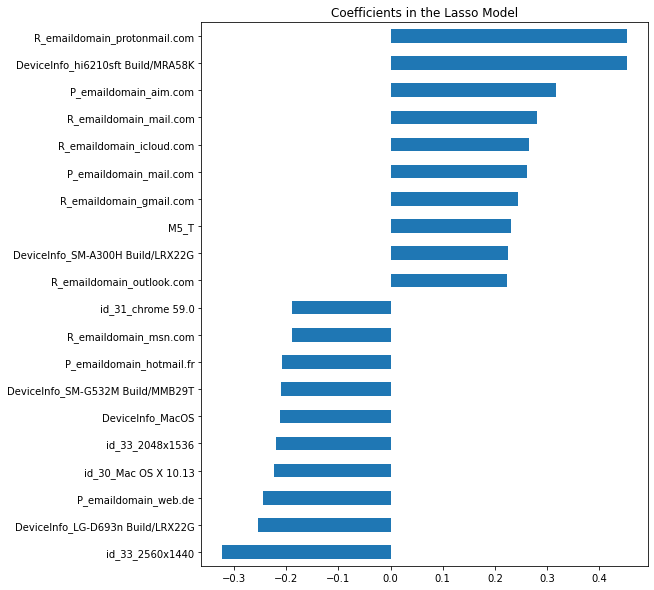

In [13]:
imp_coef = pd.concat([penalized_features.sort_values().head(10),
                      penalized_features.sort_values().tail(10)])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind="barh")
plt.title("Coefficients in the Lasso Model")

In [14]:
cat_features = penalized_features.sort_values().head(10).keys().to_list()
cat_features = cat_features + penalized_features.sort_values().tail(10).keys().to_list()
cat_features = sorted(cat_features)

# Processing Numerical Data

In [15]:
numbers = merge.select_dtypes(include=['float64', 'int64'])
numbers.fillna(numbers.mean(), inplace=True)

In [16]:
 numbers.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_13,id_14,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
0,2987000,0,86400,68.5,13926,362.555488,150.0,142.0,315.0,87.0,19.00000,231.855423,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,169.563231,13.000000,140.002441,42.335965,69.805717,41.63895,146.058108,0.561057,13.000000,13.000000,54.037533,17.901295,57.724444,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.00000,1.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.542594,0.579198,1.108065,1.1624,0.166076,0.177145,0.999269,0.156118,0.168942,1.083891,1.120779,1.022286,1.038515,0.383174,0.397724,0.164746,0.170579,0.182695,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.036439,1.073915,1.125267,0.037696,0.048581,8.397006,3.708484,22.112946,0.156276,0.168601,0.765001,0.775313,277.598028,6.46019,9.43271,0.7532,0.757423,0.767381,0.777485,0.817573,0.833461,2719.299775,47453.181173,4.843938,6.594661,5.505955,877.888928,2239.912219,359.469437,3.929514,5.859501,0.168053,1.436779,1.690908,0.132012,0.055231,0.127794,0.212639,1.376979,3.529245,6.649283,4.869012,0.924123,0.253332,0.856243,0.484692,0.132364,0.173903,1.148799,1.843752,1.014755,1.038314,1.213083,1.058984,1.237361,1.149845,0.945773,0.954227,1.08458,0.949385,0.961951,1.270749,1.119977,1.159106,444.147142,1078.327538,686.956931,18.060417,6.18936,72.284098,8.888193,35.001872,14.391835,385.137037,765.988339,536.302802,38.437547,133.208217,71.107143,1.054619,1.725784,1.367132,0.169472,1.27491

# Numerical Feature Selection with Undersampling and LassoCV

In [17]:
# Resampling numerical data at 50/50
features = numbers.columns.to_list()
features = [x for x in features if not x in to_remove]

Xn = numbers[features]
yn = numbers[target]
Xn_rus, yn_rus = rusampler.fit_resample(Xn, yn)

In [18]:
Xn_train_lasso, Xn_test_lasso, yn_train_lasso, yn_test_lasso = train_test_split(
    Xn_rus, yn_rus, test_size=0.2, random_state=123)
print(Xn_train_lasso.shape, yn_train_lasso.shape)

(33060, 401) (33060, 1)


In [19]:
scaler = StandardScaler()
scaler.fit(Xn_train_lasso)

StandardScaler()

In [20]:
model_lasson = LassoCV(
    tol=0.01, n_jobs=-1).fit(scaler.transform(Xn_train_lasso), yn_train_lasso)

penalized_featuresn = pd.Series(model_lasson.coef_, index=Xn_train_lasso.columns)
# penalized_featuresn.head()
penalized_featuresn.sort_values().head(10)

C14    -0.389853
C12    -0.162945
V323   -0.155365
V322   -0.117666
V71    -0.066676
V48    -0.065673
V73    -0.057301
V203   -0.052778
V29    -0.049405
D8     -0.046743
dtype: float64

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

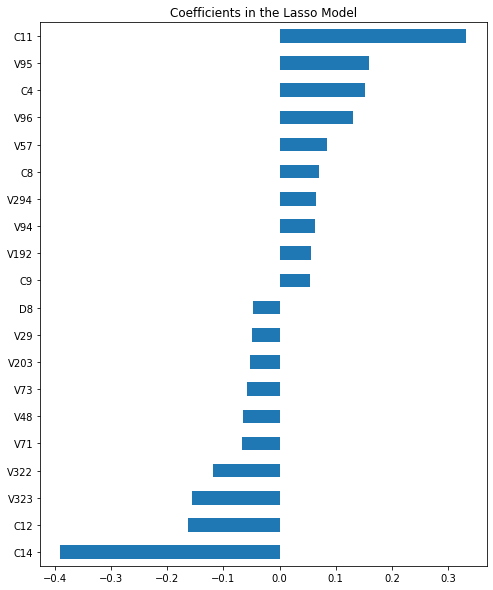

In [21]:
imp_coefn = pd.concat([penalized_featuresn.sort_values().head(10),
                      penalized_featuresn.sort_values().tail(10)])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coefn.plot(kind="barh")
plt.title("Coefficients in the Lasso Model")

In [22]:
num_features = penalized_featuresn.sort_values().head(10).keys().to_list()
num_features = num_features + penalized_featuresn.sort_values().tail(10).keys().to_list()
num_features = sorted(num_features)

# Merged Study with combined undersampled dataset

In [23]:
numbers.drop(columns='isFraud', inplace=True)
merge_filled = objects.merge(numbers, how='outer', on='TransactionID')
del objects
del numbers
merge_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 2864 entries, isFraud to id_32
dtypes: float64(399), int64(4), uint8(2461)
memory usage: 3.1 GB


In [48]:
def fraud_uds(df):
    total = df.shape[0]
    counts = df['isFraud'].value_counts()
    no_fraud = counts[0]
    fraud = counts[1]
    fraud_df = df[df['isFraud'] == 1]
    no_fraud_df = df[df['isFraud'] == 0]
    no_fraud_df = no_fraud_df.iloc[:fraud]
    undersample = pd.concat([no_fraud_df, fraud_df])
    return undersample
merge_filled = fraud_uds(merge_filled)
merge_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41326 entries, 0 to 41325
Columns: 2866 entries, level_0 to id_32
dtypes: float64(399), int64(6), uint8(2461)
memory usage: 225.0 MB


In [49]:
features = merge_filled.columns.to_list()
features = [x for x in features if not x in to_remove]
Xf = merge_filled[features]
yf = merge_filled[target]
# Xf_rus, yf_rus = rusampler.fit_resample(Xf, yf)
print(Xf.info())
print("\-----------------/")
print(len(yf))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41326 entries, 0 to 41325
Columns: 2864 entries, level_0 to id_32
dtypes: float64(399), int64(4), uint8(2461)
memory usage: 224.4 MB
None
\-----------------/
41326


In [34]:
# Xf_train, Xf_test, yf_train, yf_test = train_test_split(
#     Xf_rus, yf_rus, test_size=0.2, random_state=123)

Xf_train, Xf_test, yf_train, yf_test = train_test_split(
    Xf, yf, test_size=0.2, random_state=123)
print(Xf_train.shape, yf_train.shape, Xf_test.shape, yf_test.shape)

(33060, 2862) (33060, 1) (8266, 2862) (8266, 1)


In [27]:
# scaler = StandardScaler()
# scaler.fit(Xf_train)

StandardScaler()

In [35]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l2', C=1e42, max_iter=150, verbose=1, solver='liblinear', n_jobs=-1)
model.fit(Xf_train, yf_train)

[LibLinear]

LogisticRegression(C=1e+42, max_iter=150, n_jobs=-1, solver='liblinear',
                   verbose=1)

In [36]:
model.score(Xf_test, yf_test)

0.9641906605371401

In [37]:
yf_pred = model.predict(Xf_test)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(yf_test, yf_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      4107
           1       0.98      0.95      0.96      4159

    accuracy                           0.96      8266
   macro avg       0.96      0.96      0.96      8266
weighted avg       0.96      0.96      0.96      8266



##----------------------------------------------------------------------------------------------------------------------------------------------
## Test dataset

In [ ]:
# test set preprocessing

idee = pd.read_csv('test_identity.csv')
transaction = pd.read_csv('test_transaction.csv')
merge = transaction.merge(idee, how='outer', on='TransactionID')
print(merge.info())
print(merge.dtypes.value_counts())
objects = merge.select_dtypes('object')
numbers = merge.select_dtypes(include=['float64', 'int64'])
objects.fillna("Unknown", inplace=True)
objects = pd.get_dummies(objects)
objects['TransactionID'] = merge['TransactionID']
cols = objects.columns.to_list()
cols = cols[-1:] + cols[:-1]
objects = objects[cols]
objects.astype('category')
numbers.fillna(numbers.mean(), inplace=True)
merge_filled_test = objects.merge(numbers, how='outer', on='TransactionID')
del objects
del numbers
X_test = merge_filled_test.copy()
print(X_test.info())

In [ ]:
sample_sub = pd.read_csv('sample_submission.csv')
sample_sub.head()